In [ ]:
%pip install statsmodels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [6]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [9]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
base = base.drop(['Unnamed: 0'], axis=1)

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

<Axes: >

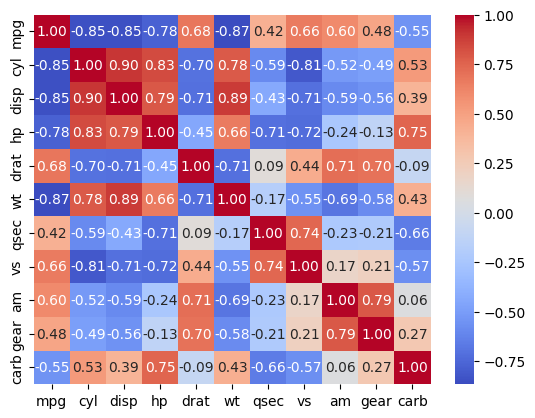

In [13]:
# Queremos estudar quais parâmetros tem mais força na coluna mpg
# Correlação é um ótimo parâmetro para avaliar isso
# São muitos atributos, então vamos fazer um correlograma
corr = base.corr()
print(corr)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

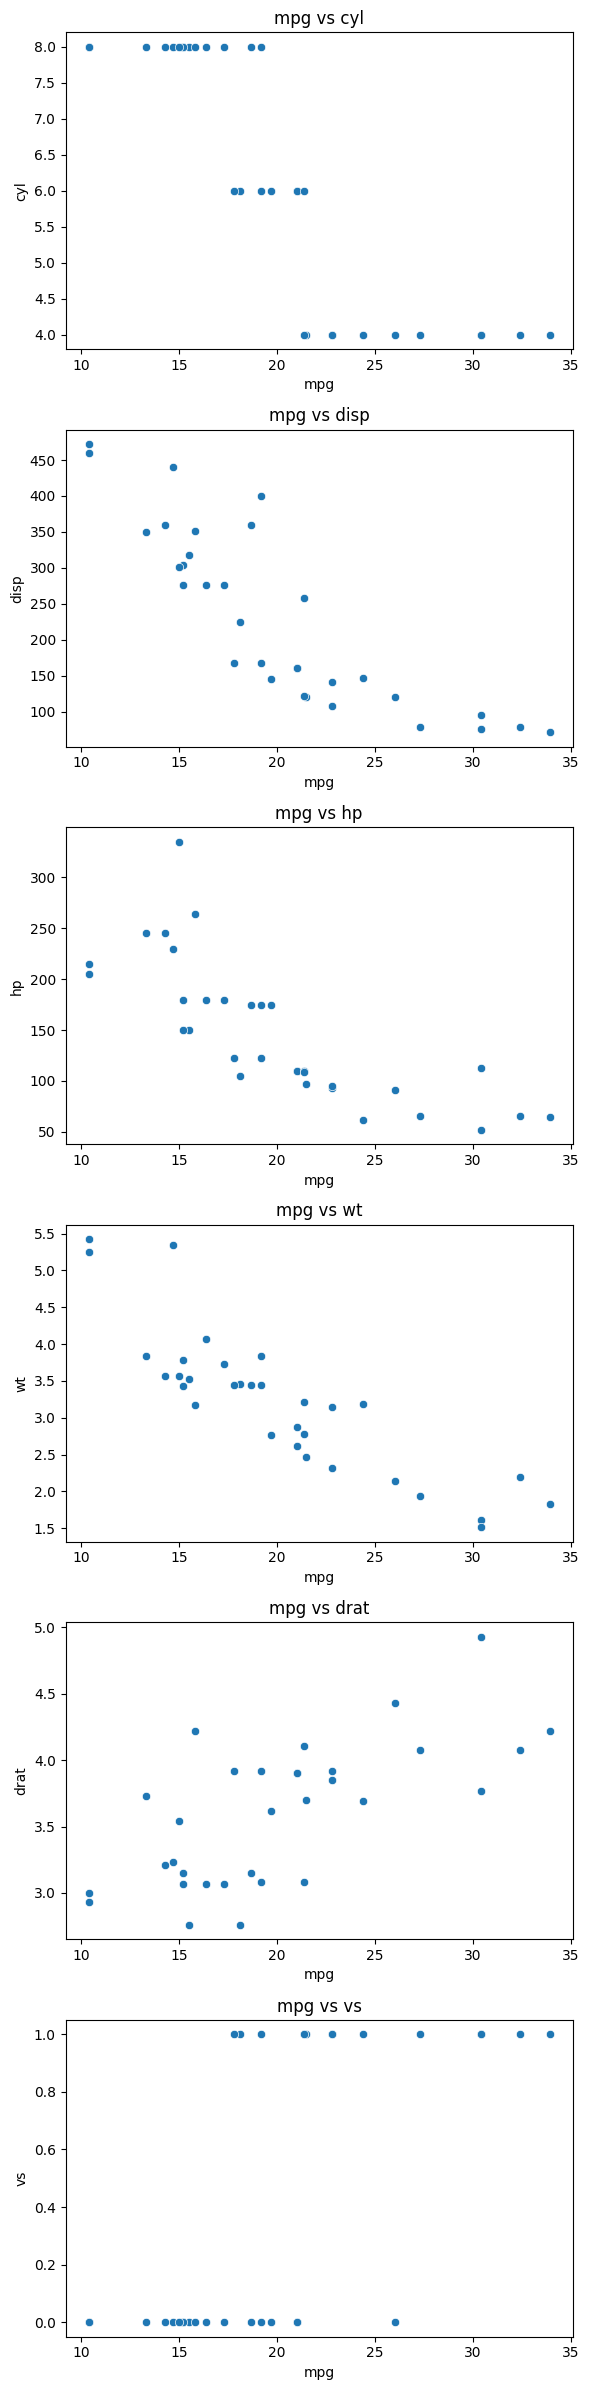

In [16]:
# Vamos gerar um gráfico de dispersão para visualizar melhor os dados
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'wt'), ('mpg', 'drat'), ('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axs = plt.subplots(nrows=n_plots, figsize=(6, 4*n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axs[i])
    axs[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [17]:
# Vamos criar o modelo agora
# define como vamos criar o modelo
modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)
# cria o modelo de fato
modelo = modelo.fit()
# trás dados sobre o modelo
modelo.summary()

# aic = 156.6
# bic = 162.5
# A ideia será abaixar essas métricas ao máximo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           8.65e-11
Time:                        12:09:22   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

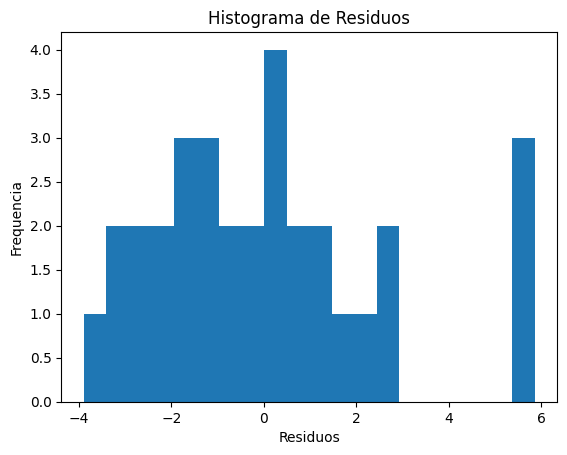

Text(0.5, 1.0, 'Q-Q plot de residuos')

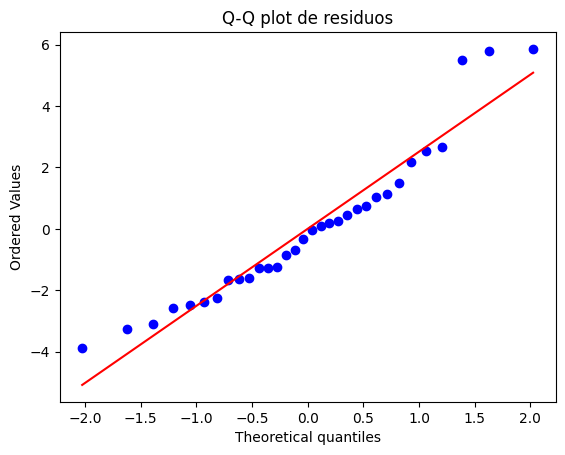

In [19]:
residuos = modelo.resid
# Para avaliar resíduos (residuais) geralmente utilizamos histogramas ou qplots
# Vamos usar histogramas aqui 
plt.hist(residuos, bins=20)
# bins = numero de eios
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

# Lembrando que os resíduais são as diferenças entre os valores esperatos e previstos

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos")

In [21]:
# Teste de Shapiro Wilk
# H0 - os dados estão geralmente distribuídos para p-valor > 0.05
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk estatística: {stat:.3f}, p-value: {pval:.3f}')

# dado p-vlor = 0.033, assim temos indícios que os dados não estão normalmente distribuídos

Shapiro-Wilk estatística: 0.927, p-value: 0.033


In [22]:
# Vamos criar um novo modelo e refazer os processos
modelo = sm.ols(formula='mpg ~ disp + cyl', data=base)
modelo = modelo.fit()
modelo.summary()

# AIC = 165.1
# BIC = 169.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.06e-09
Time:                        12:28:35   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

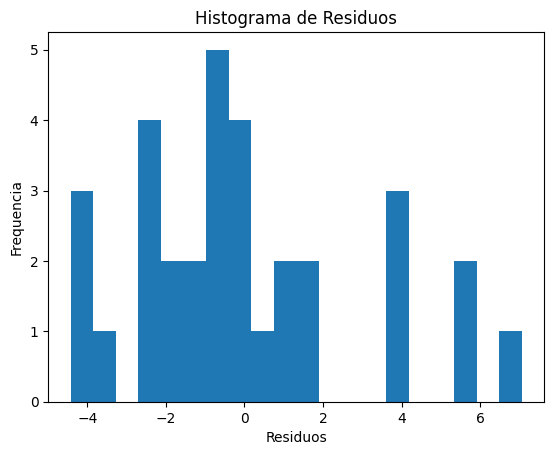

Text(0.5, 1.0, 'Q-Q plot de residuos')

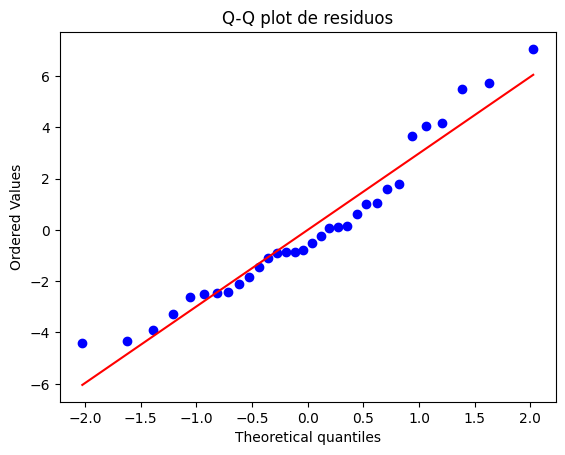

In [23]:
residuos = modelo.resid
# Para avaliar resíduos (residuais) geralmente utilizamos histogramas ou qplots
# Vamos usar histogramas aqui 
plt.hist(residuos, bins=20)
# bins = numero de eios
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

# Lembrando que os resíduais são as diferenças entre os valores esperatos e previstos

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos")

In [26]:
# Teste de Shapiro Wilk
# H0 - os dados estão geralmente distribuídos para p-valor > 0.05
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk estatística: {stat:.3f}, p-value: {pval:.3f}')

# dado p-vlor = 0.085, assim temos indícios que os dados estão normalmente distribuídos

# Do ponto de vista da 'qualidade dos dados' este modelo foi melhor
# Porém, a nível de acerto, o primeiro modelo criado foi melhor

Shapiro-Wilk estatística: 0.942, p-value: 0.085


In [27]:
# Vamos para um terceiro e último modelo com as relações positivas
# Vamos criar um novo modelo e refazer os processos
modelo = sm.ols(formula='mpg ~ drat + vs', data=base)
modelo = modelo.fit()
modelo.summary()

# AIC = 179.1
# BIC = 183.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           5.82e-07
Time:                        12:32:03   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

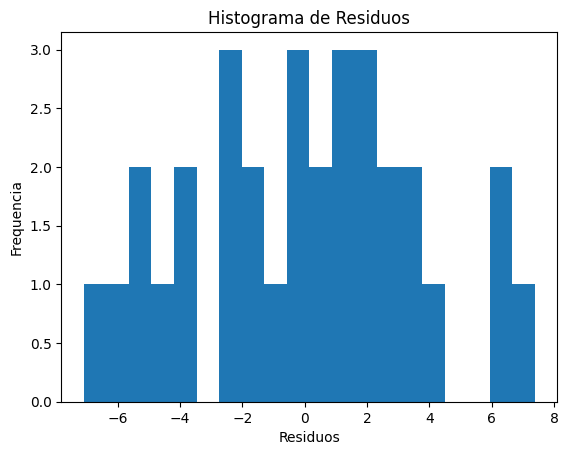

Text(0.5, 1.0, 'Q-Q plot de residuos')

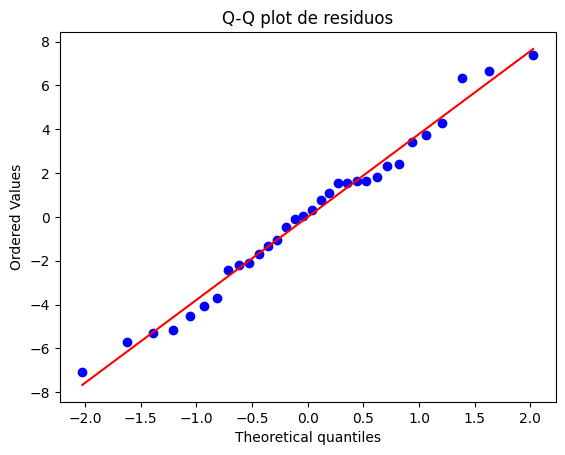

In [28]:
residuos = modelo.resid
# Para avaliar resíduos (residuais) geralmente utilizamos histogramas ou qplots
# Vamos usar histogramas aqui 
plt.hist(residuos, bins=20)
# bins = numero de eios
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

# Lembrando que os resíduais são as diferenças entre os valores esperatos e previstos

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos")

In [29]:
# Teste de Shapiro Wilk
# H0 - os dados estão geralmente distribuídos para p-valor > 0.05
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk estatística: {stat:.3f}, p-value: {pval:.3f}')

# dado p-vlor = 0.822, assim temos indícios que os dados estão normalmente distribuídos

# Do ponto de vista da 'qualidade dos dados' este modelo foi melhor
# Porém, a nível de acerto, o primeiro modelo criado foi melhor

Shapiro-Wilk estatística: 0.981, p-value: 0.822
